## Primeira Semana de Estágio


### Implementar o cutout, mixup, cutmix

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.transform import resize
from PIL import Image

#### - mostrar imagens

In [3]:
def display_images(image_1, image_2,final_image,method):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image_1)
    plt.title('Image 1')
    
    plt.subplot(1, 3, 2)
    plt.imshow(image_2)
    plt.title('Image 2')
    
    plt.subplot(1, 3, 3)
    plt.imshow(final_image)
    plt.title(method)
    
    plt.show()

In [4]:
def display_image(image_1,final_image,method):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title('Image 1')
    
    plt.subplot(1, 2, 2)
    plt.imshow(final_image)
    plt.title(method)
    
    plt.show()

#### - Implementação do cutout

'''CIFAR10/100 were normalized using per-channel mean
and standard deviation. When required, we apply the standard data augmentation scheme for these datasets [5]. Images are first zero-padded with 4 pixels on each side to obtain a 40 × 40 pixel image, then a 32 × 32 crop is randomly
extracted. Images are also randomly mirrored horizontally
with 50% probability.
Based on these validation results we select
a cutout size of 16x16 pixels to use on CIFAR-10 and a cutout size of 8x8 pixels for CIFAR-100 when training on
the full datasets.'''

In [5]:
def cutout(image, size):
    h, w = image.shape[:2]

    y1 = np.random.randint(0, h-size)
    y2 = y1 + size
    x1 = np.random.randint(0, w-size)
    x2 = x1 + size
    position(y1,x1)
    
    image[y1:y2, x1:x2] = 0
    
    return image


#### - Implementação do mixup

Motivated by these issues, we introduce a simple and data-agnostic data augmentation routine, termed mixup (Section 2). In a nutshell, mixup constructs virtual training examples:
- ``` X = λx1 + (1 − λ)xj , where xi, xj are raw input vectors ```
- ```y˜ = λyi + (1 − λ)yj , where yi, yj are one-hot label encodings```

(xi
, yi) and (xj , yj ) are two examples drawn at random from our training data, and λ ∈ [0, 1].
Therefore, mixup extends the training distribution by incorporating the prior knowledge that linear
interpolations of feature vectors should lead to linear interpolations of the associated targets. mixup
can be implemented in a few lines of code, and introduces minimal computation overhead.

In [6]:
def mixup(image_1, image_2, label_1, label_2):
    
    lamba = np.random.uniform(0, 1)

    mixed_image = lamba * image_1 + (1 - lamba) * image_2
    
    mixed_label = lamba * label_1 + (1 - lamba) * label_2
    
    return mixed_image.astype(np.uint8), mixed_label

#### - Implementação do cutmix

In [7]:
#Hiperparametros do cutmix
alpha = 1

In [8]:
def position(y,x):
    global coordenates
    coordenates = (y,x)

In [9]:
def cutmix(image_1, image_2, label_1, label_2,size):

    lamba = np.random.beta(alpha, alpha)

    cutout_image = cutout(image_1.copy(), size)
    y,x = coordenates
    
    mixed_image = cutout_image
    mixed_image[y:y+size, x:x+size] = image_2[y:y+size, x:x+size]
    
    mixed_label = lamba * label_1 + (1 - lamba) * label_2
    
    return mixed_image, mixed_label

In [10]:
def cutmix_(image_1, image_2, label_1, label_2):

    lamba = np.random.beta(alpha, alpha)
    
    #mask
    H,W = image_1.shape[0], image_1.shape[1]
    
    rw = int(W * np.sqrt(1 - lamba))
    rh = int(H * np.sqrt(1- lamba))
    rx = np.random.randint(0,W - rw)
    ry = np.random.randint(0,H - rh)
    '''
    rx = np.random.randint(0,W)
    ry = np.random.randint(0,H)
    rw = int(W * np.sqrt(1 - lamba))
    rh = int(H * np.sqrt(1- lamba))
    '''
    
    mask = np.ones_like(image_1)
    mask[ry:ry+rh, rx:rx+rw] = 0

    mixed_image = mask * image_1 + (1 - mask) * image_2

    mixed_label = lamba * label_1 + (1 - lamba) * label_2

    return mixed_image, mixed_label

- a mascara tem que ser proporcional à imagem original ??


In [11]:
image1 = io.imread('exemplo.jpg')  
image2 = io.imread('exemplo1.jpg') 

label1 = np.array([0, 1])  
label2 = np.array([1, 0])  

image_cutout = cutout(image1.copy(), 40)
image_mixup,_ = mixup(image1.copy(), image2.copy(), label1, label2)
image_cutmix,_ = cutmix(image1.copy(), image2.copy(), label1, label2, 100)
image_cutmix_,_ = cutmix_(image1.copy(), image2.copy(), label1, label2)

display_image(image1, image_cutout, 'Cutout')
display_images(image1, image2, image_mixup, 'Mixup')
display_images(image1, image2, image_cutmix, 'Cutmix 1')
display_images(image1, image2, image_cutmix_, 'Cutmix 2')

FileNotFoundError: No such file: 'c:\Users\Beatriz\Desktop\3 year (2023-2024)\2ºsemestre\estagio\ordinal_augmentation\exemplo.jpg'

## Segunda Semana de Estágio

### Reunião


In [ ]:
'''
adjacent ordinal mixup (https://arxiv.org/pdf/2007.06667.pdf)

def adjacent_ordinal_mixup(lista_imagens):
    k1 = ...  # [0,k-2]
    k2 = k1+1
    ....



ordinal mixup (airton tiago)

def ordinal_mixup(lista_imagens, tau):
    num_classes = len(lista_imagens)
    ...

def softmax(x):
    return x

def exp(center_class, num_classes, tau):
    kk = np.arange(0, num_classes)
    return softmax(np.exp(-np.abs(center_class-kk)/tau))

# escolher aleatoriamente (de forma uniforme) uma classe [0, num_classes[
# probabilities = exp(...)
# x = sum(probabilities * x)


##################################################



def cutmix_ordinal(lista_imagens):
    probabilities = exp(...)
    (o que discutimos no papel)
'''

'\nadjacent ordinal mixup (https://arxiv.org/pdf/2007.06667.pdf)\n\ndef adjacent_ordinal_mixup(lista_imagens):\n    k1 = ...  # [0,k-2]\n    k2 = k1+1\n    ....\n\n\n\nordinal mixup (airton tiago)\n\ndef ordinal_mixup(lista_imagens, tau):\n    num_classes = len(lista_imagens)\n    ...\n\ndef softmax(x):\n    return x\n\ndef exp(center_class, num_classes, tau):\n    kk = np.arange(0, num_classes)\n    return softmax(np.exp(-np.abs(center_class-kk)/tau))\n\n# escolher aleatoriamente (de forma uniforme) uma classe [0, num_classes[\n# probabilities = exp(...)\n# x = sum(probabilities * x)\n\n\n##################################################\n\n\n\ndef cutmix_ordinal(lista_imagens):\n    probabilities = exp(...)\n    (o que discutimos no papel)\n'

In [ ]:
def calcular_distance(H,W,area):
    raiz_discriminante = math.sqrt((2*(H + W))**2 - 16* area)
    distance = (-2*(H + W) + raiz_discriminante) / - 8
    return distance

In [ ]:
def probability_side(x,y,probabilities):
    probability = 0
    for k in range(x,y):
        probability += probabilities[k]
    return probability

In [ ]:
def imagens_seguintes(num_inicial, num_final, valor, probabilities, H , W, list_images):
    total_area = H*W
    y = 0
    x = 0
    image_final = list_images[num_inicial+valor].copy()
    image_final = image_final[y:H, x:W]
    #plt.imshow(image_final)

    print('num_final-num_inicial + 1:', num_final-num_inicial + 1)
    for k in range(num_inicial+valor, num_final+valor, valor):
        img_area = total_area*probabilities[k]
        print('img_area:', img_area)
        distance = int(calcular_distance(H,W,img_area))
        print('distance:', distance)
        num_inicial += valor
        H -= 2*distance
        W -= 2*distance
        
        x += distance
        y += distance
        
        image_final[y:y+H, x:x+W] = list_images[k][y:y+H, x:x+W]
        
    return image_final


In [ ]:
#def exp(num_classes, center_class, tau):
#    return softmax(np.abs(center_class - num_classes) / tau)

def exp(num_classes, center_class, tau):
    # retorna um vector (com tamanho num_classes) com a distribuição def
    # probabilidades para cada classe [0,num_classes[.
    x = np.arange(num_classes)
    return softmax(-np.abs(center_class - x) / tau)

def mixup_images(list_images, lam):
    mixup_image = np.sum(np.array(list_images) * lam[:, None, None, None], 0)
    return mixup_image

def create_lam(list_images):
    size = len(list_images)
    lam = np.zeros(size)
    return size, lam

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def ordinal_mixup(list_images):
    size, lam = create_lam(list_images)

    class_1 = np.random.randint(0, size)
    class_2 = np.random.randint(0, size)

    beta = np.random.beta(alpha, alpha)

    lam[class_1] = beta
    lam[class_2] = 1 - beta

    mixup_image = mixup_images(list_images, lam)
    return mixup_image, lam

def ordinal_adjacent_mixup(list_images):
    size, lam = create_lam(list_images)

    class_1 = np.random.randint(0, size - 2)
    class_2 = class_1 + 1

    beta = np.random.beta(alpha, alpha)

    lam[class_1] = beta
    lam[class_2] = 1 - beta

    mixup_image = mixup_images(list_images, lam)
    return mixup_image, lam

def ordinal_exponencial_mixup(list_images, tau):
    size, lam = create_lam(list_images)
    l = np.random.randint(0, size) + 1
    k = np.arange(1, size+1)
    lam = exp(k,l, tau)

    mixup_image = mixup_images(list_images, lam)
    return mixup_image, lam


In [ ]:
def ordinal_cutmix(list_images,tau):
    num_classes = len(list_images)
    x = 0
    y = 0
    center_class = np.random.randint(0, num_classes)
    probabilities = exp(num_classes,center_class, tau)
    H, W = list_images[0].shape[0:2]
    total_area = H*W
    image_final = list_images[0].copy()

    for i in range(0,num_classes-1):
        img_area = total_area*probabilities[i]
        distance = int(calcular_distance(H,W,img_area))
        H -= 2*distance
        W -= 2*distance
        #mask = np.ones_like(list_images[i])
        x += distance
        y += distance
        #mask[y:y+H, x:x+W] = 0
        #image_final = mask * image_final + (1 - mask) * list_images[i+1]
        image_final[y:y+H, x:x+W] = list_images[i+1][y:y+H, x:x+W]

    return image_final

def ordinal_cutmix_jaime(list_images, tau):
    num_classes = len(list_images)
    #center_class = np.random.randint(0, num_classes)
    #probabilities = exp(num_classes,center_class, tau)
    center_class = 3
    probabilities = [0.15, 0.15, 0.3, 0.4, 0, 0, 0]

    H, W = list_images[0].shape[0:2]
    total_area = H*W
    image_final = list_images[center_class].copy()

    probability_left = np.sum(probabilities[0:center_class]) #probability_side(0,center_class,probabilities)
    probability_rigth = np.sum(probabilities[center_class+1:])

    area_left = total_area * probability_left
    area_rigth = total_area * probability_rigth

    #supondo que o imagem vai ser um quadrado
    H_left = int(np.sqrt(area_left))
    H_rigth = int(np.sqrt(area_rigth))

    print("central :",center_class)
    print("probabilities:", probabilities)
    print("H_left:", H_left)

    image_left = imagens_seguintes(center_class, 0, -1, probabilities, H_left , H_left, list_images)
    image_rigth = imagens_seguintes(center_class, num_classes, +1, probabilities, H_rigth , H_rigth, list_images)

    #def imagens_seguintes(num_inicial, num_final, valor, probabilities, H , W, list_images):

    image_final[0:H_left,0:H_left] = image_left
    #image_final[256-H_rigth:256,256-H_rigth:256] = image_rigth
    return image_final

In [ ]:
def load_images(folder):
    images = []
    for root, _, files in os.walk(folder):
        for filename in files:
            if filename.endswith(".BMP"):
                img = io.imread(os.path.join(root, filename))
                img = resize(img,(256, 256))
                images.append(img)
    return images


list_images = load_images('smear')

In [ ]:
images_final = ordinal_cutmix_jaime(list_images,0.5)
plt.figure(figsize=(20, 4))
plt.imshow(images_final)
plt.show()

NameError: name 'ordinal_cutmix_jaime' is not defined

C:\Users\Beatriz\AppData\Local\Temp\ipykernel_16584\3455310050.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return j * torch.log(f_x) - f_x - torch.lgamma(torch.tensor(j))


tensor([-0.3973])
tensor([   -inf, -1.9014, -0.8028, -0.3973, -0.3973, -0.6850, -1.1958, -1.8890,
        -2.7363, -3.7171])
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])


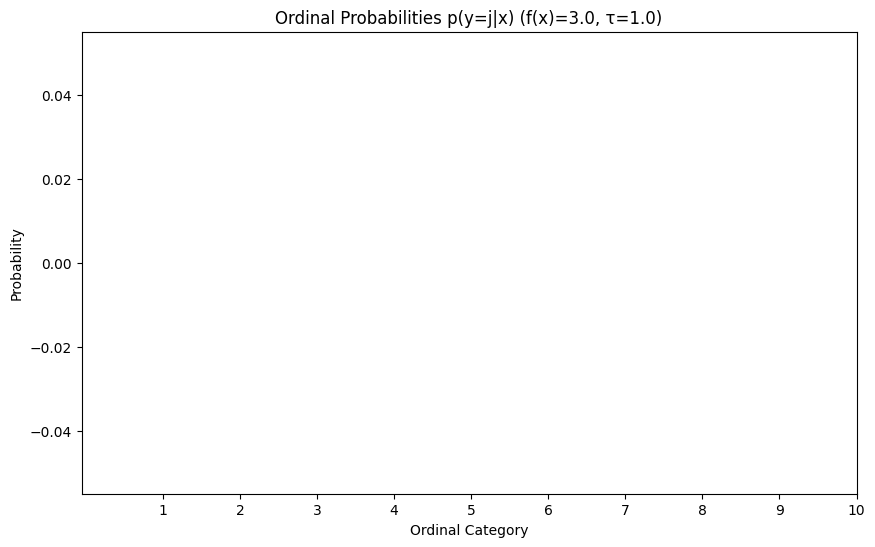

In [38]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math

def poisson_pmf_log(f_x, j):
    return j * torch.log(f_x) - f_x - torch.lgamma(torch.tensor(j))

def ordinal_probabilities(k, K, tau=1.0):

    # Calcular h(x)_j para cada categoria j
    h_x_j = torch.tensor([poisson_pmf_log(k, k)])
    h_x = poisson_pmf_log(k, j) for j in range(0,K)])
    print(h_x_j)
    print(h_x)
    
    # Calcular as probabilidades usando softmax com o parâmetro tau
    probabilities_a = F.softmax((-h_x_j / tau), dim=0)
    probabilities_d =  F.softmax((-h_x / tau),dim=0)
    probabilities = probabilities_a/probabilities_d
    print(probabilities_)
    return probabilities

# Parâmetros
k = torch.tensor(3.0)
K = 10  # número de categorias ordinais
tau = 1.0  # valor de tau (pode ser ajustado conforme necessário)

# Gerar probabilidades ordinais
ordinal_probs = ordinal_probabilities(k, K, tau)

# Plotar as probabilidades ordinais
plt.figure(figsize=(10, 6))
plt.bar(range(1, K + 1), ordinal_probs.numpy())
plt.xlabel('Ordinal Category')
plt.ylabel('Probability')
plt.title(f'Ordinal Probabilities p(y=j|x) (f(x)={k.item()}, τ={tau})')
plt.xticks(range(1, K + 1))  # Ajustar os ticks do eixo x para representar categorias ordinais
plt.show()


In [208]:
import torch
import torch.nn.functional as F

num_class = 7
rates = torch.rand(num_class)
p = torch.poisson(rates)


probabilities_a = F.softmax(-torch.log(p)/ 1.0, dim=0)

probabilities_b = torch.zeros(num_class)

for K in range(1,num_class):
    t = rates*K
    probabilities_b += torch.poisson(t)

probabilities_b = torch.tensor(probabilities_b)

print(probabilities_b)

probabilities = probabilities_a / probabilities_b
print(probabilities)
print(sum(probabilities))


tensor([0.6403, 0.9308, 0.4505, 0.3241, 0.0800, 0.4985, 0.9775])


RuntimeError: "poisson_cpu" not implemented for 'Long'

In [ ]:
def exp(num_classes, center_class, tau, device):
    x = torch.arange(num_classes, dtype=torch.float, device= device)
    return torch.nn.functional.softmax(-torch.abs(center_class[:, None] - x[None, :]) / tau, 1)

tensor([[0.0006, 0.0362, 0.2336, 0.3905, 0.2502, 0.0762, 0.0126]])


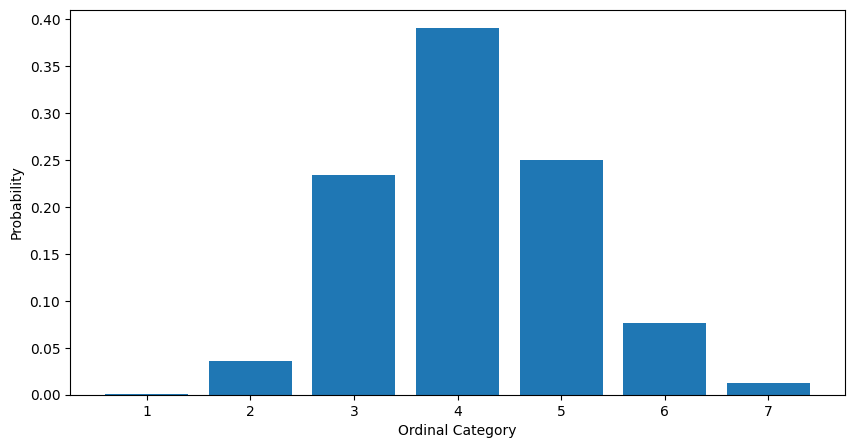

In [309]:
import torch
import matplotlib.pyplot as plt

def unimodal_poisson_probabilities(num_classes, target_class, tau, device):
    # https://proceedings.mlr.press/v70/beckham17a/beckham17a.pdf
    _lambda = target_class[:, None]+0.5  # to ensure mode falls only on this class
    j = torch.arange(num_classes, dtype=torch.float, device=device)[None]
    log_pmf = j*torch.log(_lambda) - _lambda - torch.lgamma(j+1)
    return torch.softmax(log_pmf/tau, 1)

def poisson(num_classes, target_class):
    _lambda = target_class[:, None]+0.5  # to ensure mode falls only on this class
    j = torch.arange(num_classes, dtype=torch.float)[None]
    return ((_lambda**j) * torch.exp(-_lambda)) / torch.exp(torch.lgamma(j+1))

# durante o treino: tau = tau_max * (1-epoch/epochs)

num_classes = torch.tensor(7)
target_class = torch.tensor([3])

# Gera as probabilidades
probabilities = unimodal_poisson_probabilities(num_classes, target_class, 0.3, 'cpu')
print(probabilities)

plt.figure(figsize=(10, 5))
plt.bar(range(1, num_classes+1), probabilities.numpy().flatten())
plt.xlabel('Ordinal Category')
plt.ylabel('Probability')
plt.xticks(range(1, num_classes + 1))  # Ajustar os ticks do eixo x para representar categorias ordinais
plt.show()
